In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import library to use display() instead of print() for printing formatted dataframes. 
from IPython.display import display

#Import library for Jointplot Pearsons value annotations
import scipy.stats


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [6]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies = pd.read_csv('Movie+Assignment+Data.csv')

#Temporary setting to display all the columns 
pd.set_option('display.max_columns', None)

#Check the first 5 rows of the data set. Also ensures that file has loaded correctly.
display(movies.head())

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [574]:
# Check the number of rows and columns in the dataframe

movies.shape

(100, 62)

In [575]:
# Check the column-wise info of the dataframe

#Temporary setting to display all the rows 
pd.set_option('display.max_rows', None)

movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [576]:
# Check the summary for the numeric columns 

#INSPECTING DATAFRAME : list all the columns having null values in the dataset
pd.set_option('display.max_rows', None)
cols_having_null = movies. isnull(). sum().reset_index()
cols_having_null.columns=['Column Name','Null Values']
print("Cols having null values : ")
display(cols_having_null[cols_having_null["Null Values"] > 0])




#Temporary setting to display all the columns 
pd.set_option('display.max_columns', None)

#Now we can print the summary for the numeric values
print("\nSummary for numeric columns : ")
movies.describe()

Cols having null values : 


,Column Name,Null Values
8,actor_2_facebook_likes,1
9,actor_3_facebook_likes,2
12,genre_2,3
13,genre_3,26
14,MetaCritic,5



Summary for numeric columns : 


,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,92404.170000,125762.230000,76715.280000,27841.450000,10171.750000,4330.110000,2477.070000,1711.570000,4084.350000,2.714462e+05,64468.860000,1769.050000,1318.950000,435.660000,165863.770000,128473.140000,35739.710000,124561.100000,103437.920000,19371.540000,24170.160000,19653.260000,4093.530000,624.370000,54096.740000,188245.680000,7.852000,7.910000,8.205000,8.174000,8.215000,8.005000,8.005000,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,75666.918775,62162.752481,32586.358624,12883.912563,5480.914204,2713.608902,1768.167506,1318.631164,3489.778403,1.676580e+05,39117.954828,1324.522818,1040.959361,366.499996,103522.932356,83188.725257,23092.041366,72089.245359,61116.374727,11324.680698,12841.696513,10669.041306,2187.955655,133.244262,32115.288162,106902.256347,0.263036,0.298312,0.305959,0.358059,0.381484,0.271686,0.281904,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,7321.000000,11668.000000,8558.000000,3370.000000,1162.000000,456.000000,227.000000,158.000000,293.000000,2.244100e+04,9552.000000,121.000000,95.000000,20.000000,15959.000000,10150.000000,4370.000000,12174.000000,9280.000000,2682.000000,1899.000000,1496.000000,355.000000,198.000000,3678.000000,19009.000000,7.400000,7.300000,7.500000,7.400000,7.200000,7.600000,7.600000,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,47098.250000,83207.500000,54934.500000,17834.500000,6026.000000,2293.500000,1172.750000,761.750000,1532.750000,1.719362e+05,35188.750000,756.250000,579.000000,159.750000,109797.750000,77537.750000,17637.750000,78866.250000,64930.250000,12030.500000,15288.750000,12154.750000,2492.750000,545.000000,33328.750000,121863.500000,7.675000,7.700000,8.000000,7.900000,7.975000,7.800000,7.800000,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,71376.000000,117405.500000,76862.000000,27072.000000,9123.000000,3801.000000,1950.000000,1320.000000,2933.000000,2.381995e+05,58539.500000,1420.000000,998.000000,325.500000,139321.500000,111362.000000,32639.500000,111317.500000,94010.500000,17763.000000,21869.500000,17782.000000,3771.500000,639.500000,48560.000000,169132.000000,7.800000,7.900000,8

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [577]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

#We have verified before that Gross and budget columns do not have any null values.
#So we can directly divide
movies['Gross'] = movies.Gross/1000000.0
movies['budget'] = movies.budget/1000000.0




#INSPECTING DATAFRAME : Previously, Gross and budget datatypes were int. 
#After dividing check if datatypes have now become float
print("After converting '$' to 'million $':  ",
      "Gross datatype = ", movies.Gross.dtypes,
      ", budget datatype = ",movies.budget.dtypes)

#INSPECTING DATAFRAME : As e notation is shown in values of Gross and budget columns, 
# I have rounded the decimals instead of converting datatype of the col to string just for formatting.
print("\nCheck the range of Gross and budget values : ", 
      "\nGross : Min= ",movies.Gross.min().round(5), ", Max=",movies.Gross.max().round(5),
      "\nbudget : Min= ",movies.budget.min().round(5), ", Max=",movies.budget.max().round(5))

#INSPECTING DATAFRAME :check dataset values after converting
display(movies.head())


After converting '$' to 'million $':   Gross datatype =  float64 , budget datatype =  float64

Check the range of Gross and budget values :  
Gross : Min=  0.22384 , Max= 936.66222 
budget : Min=  3.0 , Max= 260.0


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [578]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies['profit'] = movies['Gross']-movies['budget']



#INSPECTING DATAFRAME : Check the range of profit values
print("Check the range of profit values : ", 
      "Min= ",movies.profit.min().round(5), ", Max=",movies.profit.max().round(5))



Check the range of profit values :  Min=  -96.17991 , Max= 691.66222


In [579]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. 
# Make sure to set the argument 'ascending' to 'False'

#Create temporary dataframe to store the sorted values.
movies_by_profit = movies.sort_values(by=['profit'], ascending=False)



#INSPECTING DATAFRAME : Display only cols of interest, 
#also verify if profit value is correctly calculated. 
display(movies_by_profit[['Title','title_year','budget','Gross','profit']].head(15))

,Title,title_year,budget,Gross,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,691.662225
11,The Avengers,2012,220.0,623.279547,403.279547
47,Deadpool,2016,58.0,363.024263,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,294.645577
12,Toy Story 3,2010,200.0,414.984497,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,198.130642
45,The Lego Movie,2014,60.0,257.756197,197.756197
1,Zootopia,2016,150.0,341.268248,191.268248
41,Despicable Me,2010,69.0,251.501645,182.501645
18,Inside Out,2015,175.0,356.454367,181.454367


In [580]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

#Use the previously created temporary dataframe which is sorted and extract the first 10 rows from it. 
top10 = movies_by_profit[:10]



#INSPECTING DATAFRAME : Display only cols of interest to check if cols are in sorted order of profit.  
display(top10[['Title','title_year','budget','Gross','profit']])


,Title,title_year,budget,Gross,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,691.662225
11,The Avengers,2012,220.0,623.279547,403.279547
47,Deadpool,2016,58.0,363.024263,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,294.645577
12,Toy Story 3,2010,200.0,414.984497,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,198.130642
45,The Lego Movie,2014,60.0,257.756197,197.756197
1,Zootopia,2016,150.0,341.268248,191.268248
41,Despicable Me,2010,69.0,251.501645,182.501645
18,Inside Out,2015,175.0,356.454367,181.454367


<Figure size 576x576 with 0 Axes>

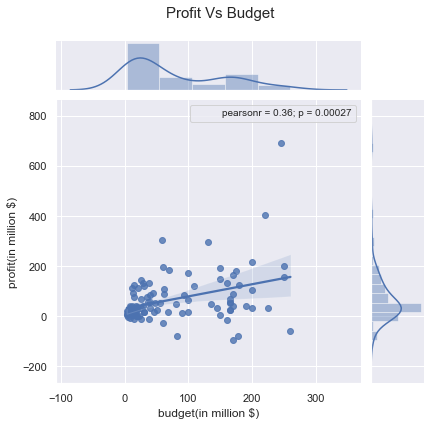

In [581]:
#Plot profit vs budget

plt.figure(figsize=[8,8])
jp=sns.jointplot(data=movies, x="budget",y="profit",kind="reg")
jp = jp.annotate(scipy.stats.pearsonr, fontsize=10)

plt.xlabel('budget(in million $)', fontsize=12)
plt.ylabel('profit(in million $)', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.suptitle("Profit Vs Budget",fontsize=15)
plt.show()


The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [582]:
print("Correlation between profit and budget  : ",movies.corr()['profit']['budget'])


Correlation between profit and budget  :  0.3566482376981701



#### - My Observations :

1) The budget varies from 0 to 300. However there are some movies showing negative profit. 

2) We can see a linear positive trend between budget and profit. The profit value is increasing when the corresponding budget value increases. Also correlation is approx = 0.35 which is positive.

3) There are many points having negative profit when the corresponding budget value increases.

4) There are few outliers having very high profit(eg : more than 400 million $) in our dataset. Comparatively, the outliers dont show that much highly negative profit values.

5) However we cannot say definitely that movies having high budget will always have higher profits.


In [583]:
#Find the movies with negative profit
#create new dataframe to store movies with negative profit
neg_profit = movies[movies.profit<0.0]



#INSPECTING DATAFRAME : Check the range of negative profit values
print("Check the range of negative profit values : ", 
      "Min= ",neg_profit.profit.min().round(5), 
      ", Max=",neg_profit.profit.max().round(5))

#INSPECTING DATAFRAME : Display only cols of interest to check if profit is negative  
display(neg_profit[['Title','title_year','budget','Gross','profit','Country']])


Check the range of negative profit values :  Min=  -96.17991 , Max= -4.77616


,Title,title_year,budget,Gross,profit,Country
7,Tangled,2010,260.0,200.807262,-59.192738,USA
17,Edge of Tomorrow,2014,178.0,100.189501,-77.810499,USA
22,Hugo,2011,170.0,73.820094,-96.179906,USA
28,X-Men: First Class,2011,160.0,146.405371,-13.594629,USA
39,The Little Prince,2015,81.2,1.339152,-79.860848,France
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,-28.505730,USA
56,Rush,2013,38.0,26.903709,-11.096291,UK
66,Warrior,2011,25.0,13.651662,-11.348338,USA
82,Flipped,2010,14.0,1.752214,-12.247786,USA
89,Amour,2012,8.9,0.225377,-8.674623,France


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [584]:
# Change the scale of MetaCritic

#INSPECTING DATAFRAME : Get range of MetaCritic values.
print("Check the range of MetaCritic values is between Min=  62.0 , Max= 100.0: ", 
      "Min= ",movies.MetaCritic.min().round(5), ", Max=",movies.MetaCritic.max().round(5))

#Note : We know from previous inspection that MetaCritic has 5 null values.
#We are cautious that such null values exist, but we do not remove them yet.
#Divide by 10 to scale from 0-10
movies['MetaCritic']=movies.MetaCritic/10.0


#INSPECTING DATAFRAME : check only cols of interest after scaling 
print("Check the new range of MetaCritic values after scaling down to 10 : ", 
      "Min= ",movies.MetaCritic.min().round(5), ", Max=",movies.MetaCritic.max().round(5))

print(" New dataframe after scaling  MetaCritic column: ")
display(movies[['Title','title_year','budget','Gross','profit','Country','MetaCritic','IMDb_rating']].head(10))


Check the range of MetaCritic values is between Min=  62.0 , Max= 100.0:  Min=  62.0 , Max= 100.0
Check the new range of MetaCritic values after scaling down to 10 :  Min=  6.2 , Max= 10.0
 New dataframe after scaling  MetaCritic column: 


,Title,title_year,budget,Gross,profit,Country,MetaCritic,IMDb_rating
0,La La Land,2016,30.0,151.101803,121.101803,USA,9.3,8.2
1,Zootopia,2016,150.0,341.268248,191.268248,USA,7.8,8.1
2,Lion,2016,12.0,51.738905,39.738905,Australia,6.9,8.1
3,Arrival,2016,47.0,100.546139,53.546139,USA,8.1,8.0
4,Manchester by the Sea,2016,9.0,47.695371,38.695371,USA,9.6,7.9
5,Hell or High Water,2016,12.0,27.007844,15.007844,USA,8.8,7.7
6,Doctor Strange,2016,165.0,232.641920,67.641920,USA,7.2,7.6
7,Tangled,2010,260.0,200.807262,-59.192738,USA,7.1,7.8
8,The Dark Knight Rises,2012,250.0,448.130642,198.130642,USA,7.8,8.4
9,Captain America: Civil War,2016,250.0,407.197282,157.197282,USA,7.5,7.9


In [585]:
# Find the average ratings

#create new column with mean of new MetaCritic and IMDb_rating ratings
movies['Avg_rating'] = movies.loc[: , ["MetaCritic","IMDb_rating"]].mean(axis=1)



#INSPECTING DATAFRAME : check only cols of interest after finding avg rating 
display(movies[['Title','title_year','budget','Gross','profit','Country','MetaCritic','IMDb_rating','Avg_rating']].head(10))


,Title,title_year,budget,Gross,profit,Country,MetaCritic,IMDb_rating,Avg_rating
0,La La Land,2016,30.0,151.101803,121.101803,USA,9.3,8.2,8.75
1,Zootopia,2016,150.0,341.268248,191.268248,USA,7.8,8.1,7.95
2,Lion,2016,12.0,51.738905,39.738905,Australia,6.9,8.1,7.50
3,Arrival,2016,47.0,100.546139,53.546139,USA,8.1,8.0,8.05
4,Manchester by the Sea,2016,9.0,47.695371,38.695371,USA,9.6,7.9,8.75
5,Hell or High Water,2016,12.0,27.007844,15.007844,USA,8.8,7.7,8.25
6,Doctor Strange,2016,165.0,232.641920,67.641920,USA,7.2,7.6,7.40
7,Tangled,2010,260.0,200.807262,-59.192738,USA,7.1,7.8,7.45
8,The Dark Knight Rises,2012,250.0,448.130642,198.130642,USA,7.8,8.4,8.10
9,Captain America: Civil War,2016,250.0,407.197282,157.197282,USA,7.5,7.9,7.70


In [586]:
#Sort in descending order of average rating 

#Create new dataframe to store the vals in desc order of avg rating
UniversalAcclaim = movies.sort_values(by=['Avg_rating'], ascending=False)


#INSPECTING DATAFRAME : check only cols of interest after sorting
display(UniversalAcclaim[['Title','title_year','budget','Gross','profit','Country','MetaCritic','IMDb_rating','Avg_rating']].head(10))



,Title,title_year,budget,Gross,profit,Country,MetaCritic,IMDb_rating,Avg_rating
94,Boyhood,2014,4.0,25.359200,21.359200,USA,10.0,7.9,8.95
69,12 Years a Slave,2013,20.0,56.667870,36.667870,USA,9.6,8.1,8.85
18,Inside Out,2015,175.0,356.454367,181.454367,USA,9.4,8.2,8.80
0,La La Land,2016,30.0,151.101803,121.101803,USA,9.3,8.2,8.75
12,Toy Story 3,2010,200.0,414.984497,214.984497,USA,9.2,8.3,8.75
4,Manchester by the Sea,2016,9.0,47.695371,38.695371,USA,9.6,7.9,8.75
34,Gravity,2013,100.0,274.084951,174.084951,UK,9.6,7.8,8.70
70,Spotlight,2015,20.0,44.988180,24.988180,USA,9.3,8.1,8.70
95,Whiplash,2014,3.3,13.092000,9.792000,USA,8.8,8.5,8.65
89,Amour,2012,8.9,0.225377,-8.674623,France,9.4,7.9,8.65


In [587]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8

#INSPECTING DATAFRAME : check before filter records with metacritic < 0.5 and avg rating > 8
display(UniversalAcclaim.shape)




# Retain only the movies where IMDb_rating - Metacritic < 0.5
UniversalAcclaim = UniversalAcclaim[((abs(UniversalAcclaim.IMDb_rating - UniversalAcclaim.MetaCritic)< 0.5) )]

#Sort in desc order of avg rating
UniversalAcclaim=UniversalAcclaim.sort_values(by=['Avg_rating'], ascending=False)

#retain records only with average rating of >8
#While creating UniversalAcclaim we had stored the vals in desc order of avg rating
#so sorting by index is enough now.
UniversalAcclaim = UniversalAcclaim[((abs(UniversalAcclaim.IMDb_rating - UniversalAcclaim.MetaCritic)< 0.5) & (UniversalAcclaim.Avg_rating >= 8))].sort_index()

#rearrange the indexes in the dataframe after filtering
UniversalAcclaim.sort_values(by=['Avg_rating'], ascending=False,inplace=True)
UniversalAcclaim.reset_index(inplace=True)




#INSPECTING DATAFRAME : check only cols of interest after filtering
display(UniversalAcclaim[['Title','title_year','budget','Gross','profit','Country','MetaCritic','IMDb_rating','Avg_rating']].head(10))

#INSPECTING DATAFRAME : check records after filtering records 
display(UniversalAcclaim.shape)



(100, 64)

,Title,title_year,budget,Gross,profit,Country,MetaCritic,IMDb_rating,Avg_rating
0,Whiplash,2014,3.3,13.092000,9.792000,USA,8.8,8.5,8.65
1,Django Unchained,2012,100.0,162.804648,62.804648,USA,8.1,8.4,8.25
2,Dallas Buyers Club,2013,5.0,27.296514,22.296514,USA,8.4,8.0,8.20
3,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,691.662225,USA,8.1,8.1,8.10
4,Arrival,2016,47.0,100.546139,53.546139,USA,8.1,8.0,8.05
5,The Martian,2015,108.0,228.430993,120.430993,USA,8.0,8.0,8.00
6,Gone Girl,2014,61.0,167.735396,106.735396,USA,7.9,8.1,8.00


(7, 65)

**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [588]:
# Write your code here

#From previos inspection we know actor2 and actor3 has null values in facebook likes.
#So we proceed with caution. 
#create new col with sum of 3 actor likes
movies['trio_facebook_likes'] = movies.actor_1_facebook_likes + movies.actor_2_facebook_likes + movies.actor_3_facebook_likes

#get the top5 popular trios
top5_trio=movies.sort_values(by=['trio_facebook_likes'], ascending=False)[0:5]

#get the values of the actor names and add to 2d-list
top5_popular_trios = top5_trio[['actor_1_name','actor_2_name','actor_3_name']].values.tolist()
display(top5_popular_trios)

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**  21

- **`Most popular trio after applying the condition:`**['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [589]:
# Your answer here (optional)

#parameters : actor fb likes
#logic : function to validate fb likes. 
#If any of the actors have less than half then it is invalid.
def validate_fb_likes(x,y,z):
    if (x < y/2.0) | (x < z/2.0) | (y < x/2.0) | (y < z/2.0) | (z < x/2.0) | (z < y/2.0) : 
        return False
    else:
        return True

    
    
#create column by checking row by row if all actors have valid facebook likes.
movies["valid_fb_likes"] = movies.apply(lambda x : validate_fb_likes(x["actor_1_facebook_likes"],  x["actor_2_facebook_likes"],   x["actor_3_facebook_likes"]), axis=1)

#shape[0] gives the no of rows. Count no of rows having value True
count_popular_trio = movies[movies.valid_fb_likes == True].shape[0]

print("No. of trios that satisfy the above condition: ",count_popular_trio)




#create new col to store the sum of fb likes of all actors
movies['trio_facebook_likes'] = movies.actor_1_facebook_likes + \
                    movies.actor_2_facebook_likes + \
                    movies.actor_3_facebook_likes

#sort in ascending order and pick first 5 rows.
top5_popular_trio = movies[movies.valid_fb_likes == True].sort_values(by=['trio_facebook_likes'], ascending=False)[0:5]

#create and print 2d-list of top5 popular trios.
top5_popular_trio[['actor_1_name','actor_2_name','actor_3_name']].values.tolist()

#Create a 2d-list of the actors names of the most popular trio from this list
most_popular_trio = top5_popular_trio[['actor_1_name','actor_2_name','actor_3_name']][0:1].values.tolist()
print ("Most popular trio after applying the condition:", most_popular_trio[0])




#INSPECTING DATAFRAME : printing value of top5 popular trios
display(top5_popular_trio)


No. of trios that satisfy the above condition:  21
Most popular trio after applying the condition: ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,trio_facebook_likes,valid_fb_likes
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,8.8,Action,Adventure,Sci-Fi,7.4,148,584839,485218,304457,130972,46393,20595,10050,6631,5243,15365,1044318,239796,5678,4462,1184,655187,512411,136770,472680,392845,73555,79634,65508,12795,885,212524,707266,8.8,8.7,9.1,9.1,9.0,9.0,9.0,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.10,79000.0,True
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,8.0,Action,Adventure,Sci-Fi,7.4,132,91765,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,2403,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33.914986,7.70,76000.0,True
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,Action,Thriller,NaN,7.8,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642,8.10,73000.0,True
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,6.9,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.50,66000.0,True
49,Moneyball,2011,50.0,75.605492,Philip Seymour Hoffman,Robin Wright,Brad Pitt,22000,18000.0,11000.0,7.6,Biography,Drama,Sport,8.7,133,20734,43329,108133,85628,27802,8094,2802,1304,778,1604,222663,34888,389,350,37,113508,97523,14950,112429,96552,14345,21998,17897,3726,645,55437,146951,7.6,7.3,8.0,8.1,7.6,7.7,7.8,7.3,7.5,7.5,7.2,7.5,7.5,7.5,7.1,7.8,7.5,PG-13,USA,25.605492,8.15,51000.0,True


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

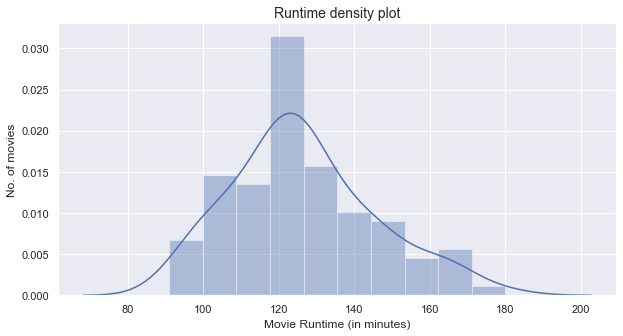

In [590]:
# Runtime histogram/density plot
plt.figure(figsize=[10,5])
sns.distplot(movies.Runtime)
plt.ylabel('No. of movies',fontsize=12)
plt.xlabel('Movie Runtime (in minutes)',fontsize=12)
plt.title('Runtime density plot',fontsize=14)
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [591]:
# Write your code here

#create temporary dataframe for R-rated movies.
movies_R_rating = movies[movies['content_rating'] == 'R']

#get first 10 rows after sorting by no of votes 
PopularR = movies_R_rating.sort_values(by="CVotesU18", ascending=False)[0:10]

#INSPECTING DATAFRAME : printing value of top10 popular R-rated movies voted by under18 age group
display(PopularR)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,trio_facebook_likes,valid_fb_likes
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,6.5,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,17166.0,False
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,8.2,Biography,Comedy,Crime,7.5,180,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,559564,123698,3622,2842,757,360841,286627,70874,227096,189110,34712,39996,32676,6629,730,89006,366829,8.2,7.8,8.6,8.7,8.0,8.4,8.5,7.9,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85,44000.0,False
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,40265.0,False
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,8.1,Action,Adventure,Sci-Fi,9.0,120,136194,158403,163494,97218,42636,19505,9932,6743,4930,10516,424435,69670,3159,2682,456,238202,198026,37751,183637,159520,21373,34848,29980,4209,726,73080,267084,8.1,7.9,8.5,8.6,8.4,8.3,8.3,8.1,8.0,8.0,7.8,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55,36943.0,False
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0,False
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,8.0,Adventure,Drama,Thriller,7.6,156,79977,121229,158019,91154,33492,12837,5571,3386,2320,4570,323938,61051,2619,2141,458,186003,152198,31926,138923,118140,18699,28582,23782,4269,624,51493,213741,8.0,7.9,8.5,8.5,8.2,8.1,8.2,7.9,7.9,7.9,7.7,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80,56733.0,False
40,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,8.1,Mystery,Thriller,NaN,6.3,138,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,570554,136360,2321,1811,494,364786,283316,78332,263273,217923,42222,43235,35277,7256,840,108244,419648,8.1,8.2,8.6,8.6,8.8,8.4,8.4,8.4,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,R,USA,47.968405,7.20,29386.0,False
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,8.1,Crime,Drama,Mystery,7.9,149,89539,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00,2272.0,True
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,10

**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [592]:
# Create the dataframe df_by_genre

#create col list of the required cols
collist = ['genre_1','genre_2','genre_3']
collist1 = movies.loc[:,'CVotes10':'VotesnUS'].columns.tolist()
cols = collist + collist1

#fetch the cols from movies dataset into new dataframe
df_by_genre = movies[cols]

#INSPECTING DATAFRAME : check if there are 47 cols in new dataframe and check 5 rows of the dataframe
print("No of cols in new dataframe : ", df_by_genre.shape[1])
display(df_by_genre.head())

No of cols in new dataframe :  47


,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [593]:
# Create a column cnt and initialize it to 1
df_by_genre["cnt"] = 1

#INSPECTING DATAFRAME : check 5 rows of the dataframe
display(df_by_genre.head())

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,1
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,1
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1


In [594]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby(['genre_1'])
df_by_g2 = df_by_genre.groupby(['genre_2'])
df_by_g3 = df_by_genre.groupby(['genre_3'])

# display(df_by_g1.head(5))
# # display(df_by_g2.head(5))
# # display(df_by_g3.head(5))


In [595]:
# Add the grouped data frames and store it in a new data frame

#Get sum of each dataframes
df_by_g1 = df_by_genre.groupby(['genre_1']).sum()
df_by_g2 = df_by_genre.groupby(['genre_2']).sum()
df_by_g3 = df_by_genre.groupby(['genre_3']).sum()

#add dataframes
df_add1 = df_by_g1.add(df_by_g2,fill_value=0)
df_add = df_add1.add(df_by_g3,fill_value=0)


#reset the index values so that genre becomes normal column
df_add.reset_index(inplace=True)
df_add.rename(columns={'index': 'genre'}, inplace=True)


#INSPECTING DATAFRAME : check 5 rows of the dataframe
display(df_add.head())



,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,10837034.0,2105410.0,76280.0,59424.0,16302.0,6314227.0,5105793.0,1146894.0,4824318.0,4117926.0,639437.0,894736.0,746866.0,132357.0,21123.0,2144895.0,7005964.0,243.2,245.6,253.8,252.8,256.8,247.8,247.5,248.0,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
1,Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,11759815.0,2705904.0,95791.0,72215.0,22864.0,7165429.0,5578727.0,1516049.0,5262641.0,4400217.0,788533.0,1012382.0,832607.0,162152.0,25157.0,2345901.0,7905326.0,298.4,304.5,311.4,309.3,314.9,304.9,304.3,307.3,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
2,Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,2282985.0,724844.0,23835.0,16354.0,7307.0,1588630.0,1140646.0,432464.0,1043387.0,834069.0,195268.0,179365.0,142636.0,33699.0,6364.0,524406.0,1654665.0,86.4,89.3,88.9,87.7,90.7,88.5,87.9,90.2,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
3,Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,4329471.0,986889.0,20937.0,15962.0,4780.0,2603294.0,2052779.0,524830.0,1999316.0,1658844.0,312373.0,405909.0,324710.0,74280.0,10804.0,817016.0,3078088.0,141.1,141.8,146.9,146.6,146.9,143.4,143.7,142.8,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
4,Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,5223033.0,1498288.0,37971.0,27099.0,10574.0,3404755.0,2507369.0,862715.0,2453650.0,1985974.0,433363.0,458960.0,367532.0,83303.0,13934.0,1132079.0,3815002.0,180.2,181.2,187.4,186.9,186.9,183.6,183.8,182.8,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [596]:
# Extract genres with atleast 10 occurences
 
#sort by cnt and get top10 genres
genre_top10 = df_add.sort_values(by="cnt",ascending=False)[0:10]

#INSPECTING DATAFRAME : check 5 rows of the dataframe
display(genre_top10.head())



,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,14668668.0,3572166.0,80847.0,59481.0,20608.0,8871540.0,6838230.0,1943300.0,6897952.0,5696903.0,1102691.0,1404823.0,1132442.0,247420.0,38086.0,2870687.0,10480222.0,509.8,510.3,533.6,532.2,529.7,519.0,519.7,514.8,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
1,Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,11759815.0,2705904.0,95791.0,72215.0,22864.0,7165429.0,5578727.0,1516049.0,5262641.0,4400217.0,788533.0,1012382.0,832607.0,162152.0,25157.0,2345901.0,7905326.0,298.4,304.5,311.4,309.3,314.9,304.9,304.3,307.3,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
0,Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,10837034.0,2105410.0,76280.0,59424.0,16302.0,6314227.0,5105793.0,1146894.0,4824318.0,4117926.0,639437.0,894736.0,746866.0,132357.0,21123.0,2144895.0,7005964.0,243.2,245.6,253.8,252.8,256.8,247.8,247.5,248.0,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
4,Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,5223033.0,1498288.0,37971.0,27099.0,10574.0,3404755.0,2507369.0,862715.0,2453650.0,1985974.0,433363.0,458960.0,367532.0,83303.0,13934.0,1132079.0,3815002.0,180.2,181.2,187.4,186.9,186.9,183.6,183.8,182.8,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
3,Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,4329471.0,986889.0,20937.0,15962.0,4780.0,2603294.0,2052779.0,524830.0,1999316.0,1658844.0,312373.0,405909.0,324710.0,74280.0,10804.0,817016.0,3078088.0,141.1,141.8,146.9,146.6,146.9,143.4,143.7,142.8,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0


In [597]:
# Take the mean for every column by dividing with cnt 

#get all the column name,  
columns_to_divide = genre_top10.columns.tolist()

#skip skip genre because datatype is of string type to calculate the mean.
columns_to_divide.pop(0)

#skip skip cnt col
columns_to_divide.pop()

display(columns_to_divide)
# display(df_add.head())



#store mean back to the same dataframe
genre_top10[columns_to_divide] = genre_top10[columns_to_divide].div(genre_top10['cnt'].values,axis=0)



#INSPECTING DATAFRAME : check 5 rows of the dataframe
display(genre_top10.head())


['CVotes10',
 'CVotes09',
 'CVotes08',
 'CVotes07',
 'CVotes06',
 'CVotes05',
 'CVotes04',
 'CVotes03',
 'CVotes02',
 'CVotes01',
 'CVotesMale',
 'CVotesFemale',
 'CVotesU18',
 'CVotesU18M',
 'CVotesU18F',
 'CVotes1829',
 'CVotes1829M',
 'CVotes1829F',
 'CVotes3044',
 'CVotes3044M',
 'CVotes3044F',
 'CVotes45A',
 'CVotes45AM',
 'CVotes45AF',
 'CVotes1000',
 'CVotesUS',
 'CVotesnUS',
 'VotesM',
 'VotesF',
 'VotesU18',
 'VotesU18M',
 'VotesU18F',
 'Votes1829',
 'Votes1829M',
 'Votes1829F',
 'Votes3044',
 'Votes3044M',
 'Votes3044F',
 'Votes45A',
 'Votes45AM',
 'Votes45AF',
 'Votes1000',
 'VotesUS',
 'VotesnUS']

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,225671.815385,54956.400000,1243.800000,915.092308,317.046154,136485.230769,105203.538462,29896.923077,106122.338462,87644.661538,16964.476923,21612.661538,17422.184615,3806.461538,585.938462,44164.415385,161234.184615,7.843077,7.850769,8.209231,8.187692,8.149231,7.984615,7.995385,7.920000,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
1,Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,309468.815789,71208.000000,2520.815789,1900.394737,601.684211,188563.921053,146808.605263,39896.026316,138490.552632,115795.184211,20750.868421,26641.631579,21910.710526,4267.157895,662.026316,61734.236842,208034.894737,7.852632,8.013158,8.194737,8.139474,8.286842,8.023684,8.007895,8.086842,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
0,Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,349581.741935,67916.451613,2460.645161,1916.903226,525.870968,203684.741935,164703.000000,36996.580645,155623.161290,132836.322581,20627.000000,28862.451613,24092.451613,4269.580645,681.387097,69190.161290,225998.838710,7.845161,7.922581,8.187097,8.154839,8.283871,7.993548,7.983871,8.000000,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
4,Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,227088.391304,65142.956522,1650.913043,1178.217391,459.739130,148032.826087,109016.043478,37509.347826,106680.434783,86346.695652,18841.869565,19954.782609,15979.652174,3621.869565,605.826087,49220.826087,165869.652174,7.834783,7.878261,8.147826,8.126087,8.126087,7.982609,7.991304,7.947826,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
3,Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,240526.166667,54827.166667,1163.166667,886.777778,265.555556,144627.444444,114043.277778,29157.222222,111073.111111,92158.000000,17354.055556,22550.500000,18039.444444,4126.666667,600.222222,45389.777778,171004.888889,7.838889,7.877778,8.161111,8.144444,8.161111,7.966667,7.983333,7.933333,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0


In [598]:
# Rounding off the columns of Votes to two decimals
#get all the column name,  
columns_to_round = genre_top10.columns.tolist()

#skip skip genre because datatype is of string type to calculate the mean.
columns_to_round.pop(0)

genre_top10[columns_to_round] = genre_top10[columns_to_round].round(decimals=2)

#INSPECTING DATAFRAME : check 5 rows of the dataframe
display(genre_top10.head())

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,52375.97,75928.85,109339.28,66456.92,23528.55,8497.11,3622.69,2078.86,1449.00,3250.89,225671.82,54956.40,1243.80,915.09,317.05,136485.23,105203.54,29896.92,106122.34,87644.66,16964.48,21612.66,17422.18,3806.46,585.94,44164.42,161234.18,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
1,Adventure,94596.29,105636.63,138482.32,86367.92,31896.71,11551.84,4817.63,2718.89,1835.18,4575.21,309468.82,71208.00,2520.82,1900.39,601.68,188563.92,146808.61,39896.03,138490.55,115795.18,20750.87,26641.63,21910.71,4267.16,662.03,61734.24,208034.89,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
0,Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,349581.74,67916.45,2460.65,1916.90,525.87,203684.74,164703.00,36996.58,155623.16,132836.32,20627.00,28862.45,24092.45,4269.58,681.39,69190.16,225998.84,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
4,Comedy,60157.22,77173.35,108993.52,69176.91,26099.43,9863.13,4237.78,2444.26,1712.65,3842.04,227088.39,65142.96,1650.91,1178.22,459.74,148032.83,109016.04,37509.35,106680.43,86346.70,18841.87,19954.78,15979.65,3621.87,605.83,49220.83,165869.65,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
3,Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,240526.17,54827.17,1163.17,886.78,265.56,144627.44,114043.28,29157.22,111073.11,92158.00,17354.06,22550.50,18039.44,4126.67,600.22,45389.78,171004.89,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0


In [599]:
# Converting CVotes to int type

#CVotes can be of datatype int but they are of datatype float
# genre_top10.info()
columns_to_int = genre_top10.loc[:,'CVotes10':'CVotesnUS'].columns.tolist()
genre_top10[columns_to_int] = genre_top10[columns_to_int].astype(int)

#INSPECTING DATAFRAME : check 5 rows of the dataframe
display(genre_top10.head())


,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,225671,54956,1243,915,317,136485,105203,29896,106122,87644,16964,21612,17422,3806,585,44164,161234,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,309468,71208,2520,1900,601,188563,146808,39896,138490,115795,20750,26641,21910,4267,662,61734,208034,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,349581,67916,2460,1916,525,203684,164703,36996,155623,132836,20627,28862,24092,4269,681,69190,225998,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,227088,65142,1650,1178,459,148032,109016,37509,106680,86346,18841,19954,15979,3621,605,49220,165869,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,240526,54827,1163,886,265,144627,114043,29157,111073,92158,17354,22550,18039,4126,600,45389,171004,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

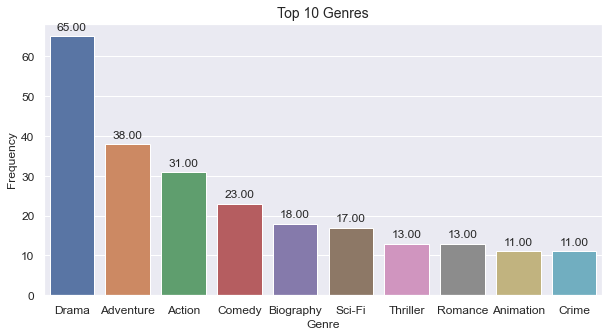

In [600]:
# Countplot for genres
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.barplot(x="genre",y="cnt",data=genre_top10)


#Title, Labels : 
ax.set_title('Top 10 Genres', fontsize=14)
ax.set(xlabel='Genre', ylabel='Frequency')
for item in ([ ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
    
#Plot Annotations : 
#parameter vals of : matplotlib.pyplot.annotate()  : 
#1. format(.2f) - to show values upto 2 decimal places  
#2. xytext - position (x, y) to show annotation on top of the bars
#3. ha, va - horizontal and vertical alignments of annotated text wrt the bars
#4. textcoords - Coordinate system used for xytext 
#5. xy - pt(x,y) which is to be annotated.
for p in ax.patches:
#     print(p.get_height(),":",p.get_x(),":",p.get_width())

    bar_width=  p.get_width()# which is 0.8
    pt_x = p.get_x() + bar_width / 2.0
    pt_y = p.get_height()
    txt_label = format(pt_y, '.2f')
    
    ax.annotate(txt_label, 
                   xy=(pt_x , pt_y), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9), 
                    size=12,
                   textcoords = 'offset points')
plt.show(ax)



**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

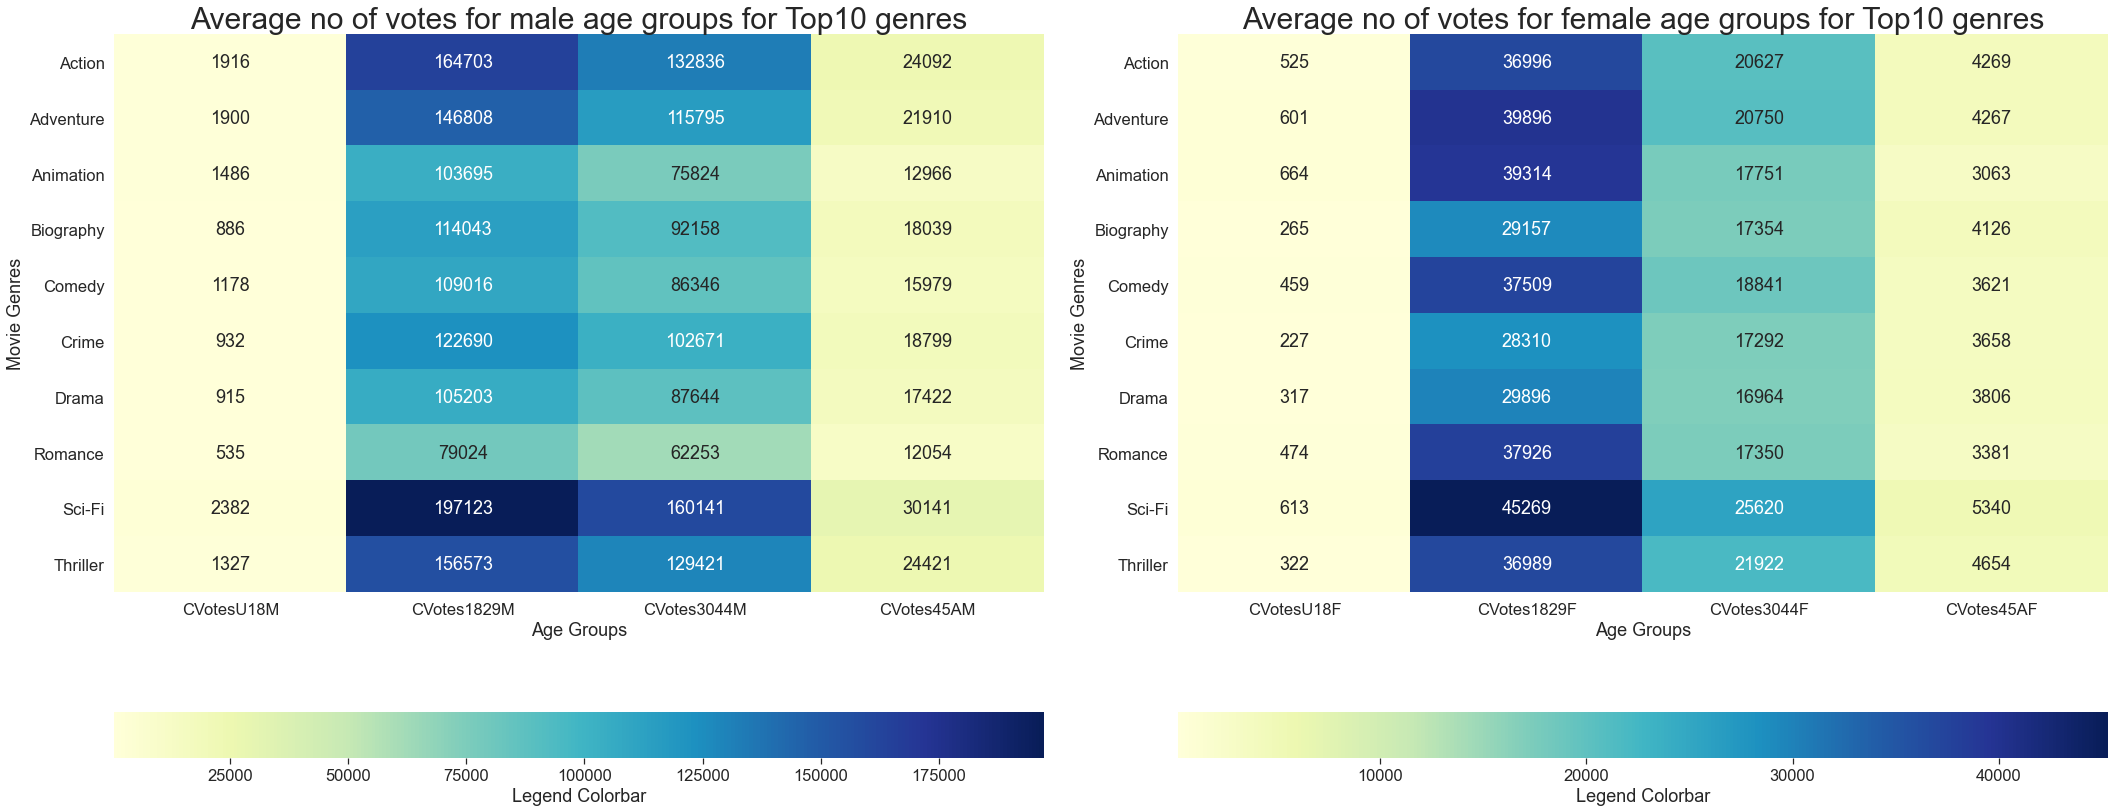

In [601]:
# 1st set of heat maps for CVotes-related columns

#Create pivot tables for male and female votes for the genres.
male_pivot=genre_top10.groupby(["genre"])["CVotesU18M",'CVotes1829M', 'CVotes3044M', "CVotes45AM"].mean()
# display(male_pivot)

female_pivot=genre_top10.groupby(["genre"])["CVotesU18F",'CVotes1829F', 'CVotes3044F', "CVotes45AF"].mean()
# display(female_pivot)


#increase font size of the graph
sns.set(font_scale=1.5)
fig,ax = plt.subplots(1, 2,figsize = (30,12))

#heatmap parameters : 
#1. annot=True - to show average values in the cells
#2. cbar =False - to show colour bar in the map
#3. cbar_kws= colorbar properties to show the color bar below the map instead of to the right
#4. cmap = choose the colors 
male_heat_map = sns.heatmap(
            data=male_pivot,
            annot=True,
            cbar=True,
            cbar_kws={'label': 'Legend Colorbar', 'orientation': 'horizontal'},
            cmap="YlGnBu",
            fmt='d',
            xticklabels=True, 
            yticklabels=True,
            ax=ax[0])

#Labels and title
ax[0].set_xticklabels(male_heat_map.get_xticklabels(),rotation=0)
ax[0].set_yticklabels(male_heat_map.get_yticklabels(), rotation=0)
ax[0].set(xlabel='Age Groups', ylabel='Movie Genres')
ax[0].set_title('Average no of votes for male age groups for Top10 genres',fontsize=30)

#heatmap plot : 
female_heat_map = sns.heatmap(
            data=female_pivot,
            annot=True,
            cbar=True,
            cbar_kws={'label': 'Legend Colorbar', 'orientation': 'horizontal'},
            cmap="YlGnBu",
            fmt='d',
            xticklabels=True, yticklabels=True,
            ax=ax[1])

#Labels and title
ax[1].set_xticklabels(female_heat_map.get_xticklabels(),rotation=0)
ax[1].set_yticklabels(female_heat_map.get_yticklabels(), rotation=0)
ax[1].set(xlabel='Age Groups', ylabel='Movie Genres')
ax[1].set_title('Average no of votes for female age groups for Top10 genres',fontsize=30)

plt.tight_layout()
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
#### - Inference 1:

i) Age groups between 18 to 44 have voted most irrespective of their gender. 

2) The U18 and 45A age groups have voted very less votes compared to 18-44 age group on an average.


#### - Inference 2:


1) Males of all age groups have voted mostly for genres - Action, Adventure and Thriller after Sci-Fi.

2) Females of all age groups have voted almost equally over a wider range of categories - Action, Adventure, Animation,Romance,Comedy and Thrillers after Sci-Fi

#### - Inference 3:

1) Romance is the least voted genre by Males of all age groups.

2) Crime is the least voted genre by Females of all age groups.

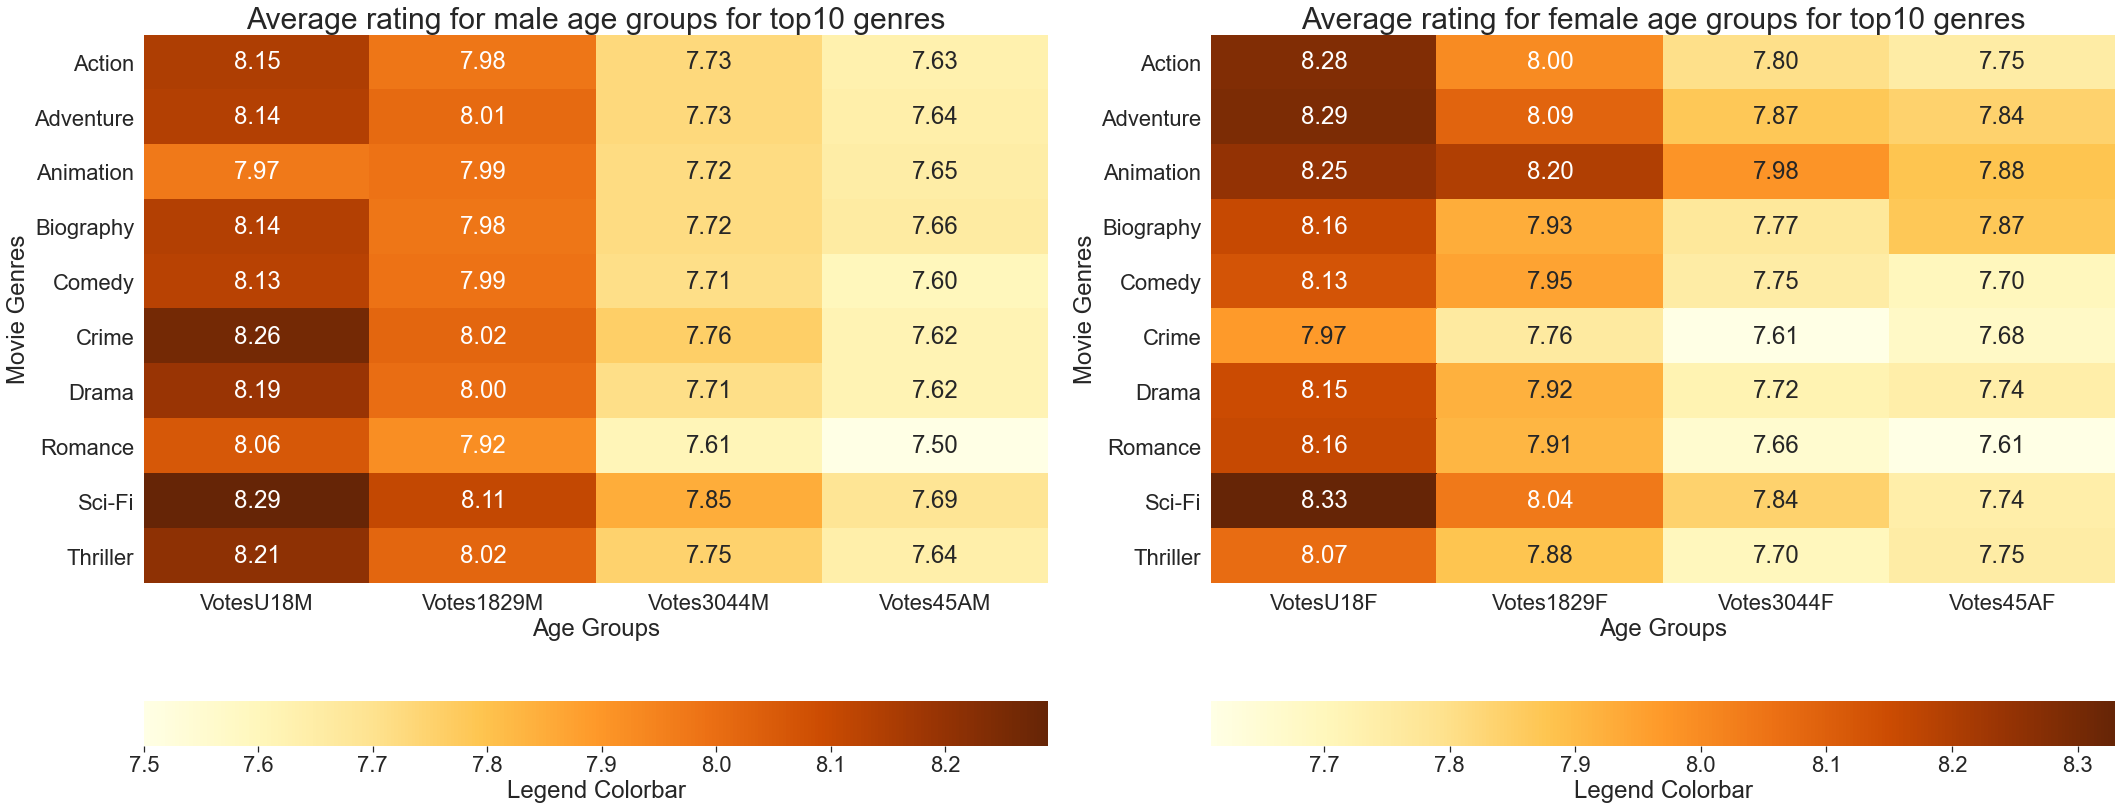

In [602]:
# 2nd set of heat maps for Votes-related columns
#  These heatmaps will show you how the two genders have rated movies across various genres.
# display(genre_top10.info())
male_votes_pivot=genre_top10.groupby(["genre"])["VotesU18M",'Votes1829M', 'Votes3044M', "Votes45AM"].mean()
# display(male_pivot)
 
female_votes_pivot=genre_top10.groupby(["genre"])["VotesU18F",'Votes1829F', 'Votes3044F', "Votes45AF"].mean()
# display(female_pivot)

#increase font size of the graph
sns.set(font_scale=2)

fig,ax = plt.subplots(1, 2,figsize = (30,12))
#parameters : 
#1. annot=True - to show average values in the cells
#2. cbar =False - to show colour bar in the map
#3. cbar_kws= colorbar properties to show the color bar below the map instead of to the right
#4. cmap = choose the colors 

male_heat_map = sns.heatmap(
            data=male_votes_pivot,
            annot=True,
            cbar=True,
            cbar_kws={'label': 'Legend Colorbar', 'orientation': 'horizontal'},
            cmap="YlOrBr",
            fmt='.2f',
            xticklabels=True, 
            yticklabels=True,
            ax=ax[0])
ax[0].set_xticklabels(male_heat_map.get_xticklabels(),rotation=0)
ax[0].set_yticklabels(male_heat_map.get_yticklabels(), rotation=0)
ax[0].set(xlabel='Age Groups', ylabel='Movie Genres')
ax[0].set_title('Average rating for male age groups for top10 genres',fontsize=30)

female_heat_map = sns.heatmap(
            data=female_votes_pivot,
            annot=True,
            cbar=True,
            cbar_kws={'label': 'Legend Colorbar', 'orientation': 'horizontal'},
            cmap="YlOrBr",
            fmt='.2f',
            xticklabels=True, yticklabels=True,
            ax=ax[1])
ax[1].set_xticklabels(female_heat_map.get_xticklabels(),rotation=0)
ax[1].set_yticklabels(female_heat_map.get_yticklabels(), rotation=0)
ax[1].set(xlabel='Age Groups', ylabel='Movie Genres')
ax[1].set_title('Average rating for female age groups for top10 genres',fontsize=30)

plt.tight_layout()
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
#### - Inference 1:

1) Higher rating values are given across all the genres by under 18 to 29 age groups irrespective of gender.

2) Females in general have given higher rating values to the genres than males from same age groups.

#### - Inference 2:

1) Romance in general the least rated genre by males and females in all age groups.

#### - Inference 3:

1) Animation seems least rated genre by males in general.

2) Crime seems least rated genre by females in general.


-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [603]:
# Creating IFUS column
# movies.info()
movies['IFUS'] = movies.Country.apply(lambda x: 'USA' if x == 'USA' else 'non-USA')


#INSPECTING DATAFRAME : find IQR for US/non-US people
t=movies[movies.IFUS == 'USA' ]
t1=movies[movies.IFUS == 'non-USA' ]

print("IQR of US people who voted for USA movies: ",t.CVotesUS.quantile(0.75) - t.CVotesUS.quantile(0.25))
print("IQR of US people who voted for non-USA movies: ",t1.CVotesUS.quantile(0.75) - t1.CVotesUS.quantile(0.25))

print("IQR of non-US people who voted for USA movies: ",t.CVotesnUS.quantile(0.75) - t.CVotesnUS.quantile(0.25))
print("IQR of non-US people who voted for non-USA movies: ",t1.CVotesnUS.quantile(0.75) - t1.CVotesnUS.quantile(0.25))


#INSPECTING DATAFRAME : check USA vs non-USA people
# movies.info()
movies.IFUS.value_counts()

IQR of US people who voted for USA movies:  33466.0
IQR of US people who voted for non-USA movies:  40815.0
IQR of non-US people who voted for USA movies:  109638.0
IQR of non-US people who voted for non-USA movies:  149940.0


USA        81
non-USA    19
Name: IFUS, dtype: int64

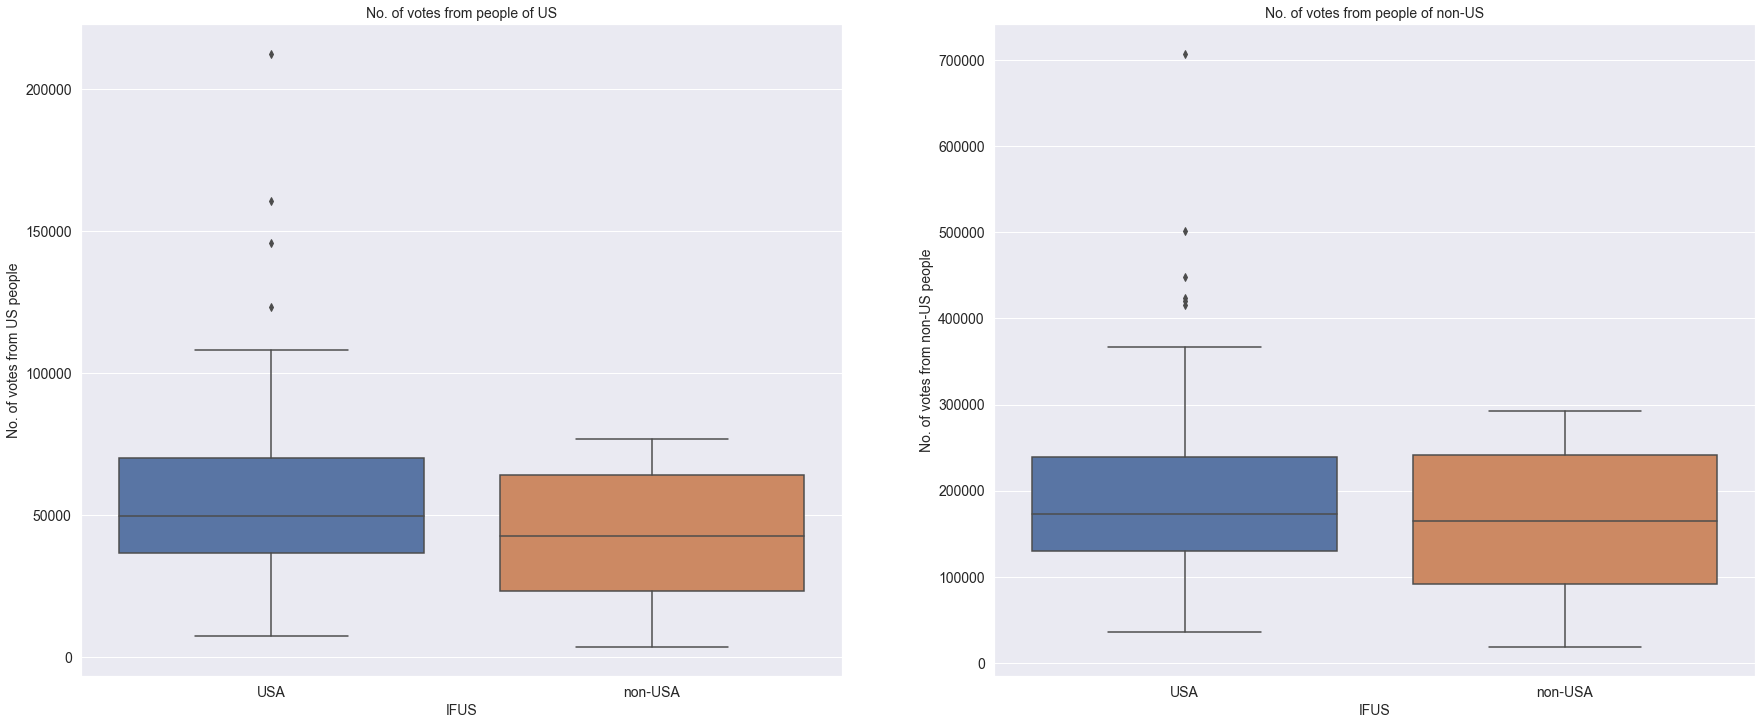

In [604]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

#increase font size of the graph
sns.set(font_scale=2)
fig,ax = plt.subplots(1, 2,figsize = (30,12))

#Plot 1 - US people
ax[0] = sns.boxplot(x="IFUS",y="CVotesUS",data=movies,ax=ax[0])
ax[0].set_title('No. of votes from people of US', fontsize=14)
ax[0].set(xlabel='IFUS', ylabel='No. of votes from US people')
for item in ([ ax[0].xaxis.label, ax[0].yaxis.label] +
             ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    item.set_fontsize(14)
    
#Plot 2 - non-US people
ax[1] = sns.boxplot(x="IFUS",y="CVotesnUS",data=movies,ax=ax[1])
ax[1].set_title('No. of votes from people of non-US', fontsize=14)
ax[1].set(xlabel='IFUS', ylabel='No. of votes from non-US people')
for item in ([ ax[1].xaxis.label, ax[1].yaxis.label] +
             ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    item.set_fontsize(14)
    
plt.show()


**`Inferences:`** Write your two inferences/observations below:
#### - Inference 1:

1) In first plot, median no of votes from US people is approx 50000 for both kinds (USA and non-USA) movies. 

Median value is almost same for USA(49868.0) and non-USA(42759.5) movies. But data spread is different around the median.

Also in US, most people gave more votes for USA movies than non-USA movies.

2) Comparatively in second plot the median no of votes from non-US people is approx 200000 which is much higher.

Median value is also almost same for USA(173536.0) and non-USA(166522.5) movies. But data spread is different around the median.

In non-US, people gave almost same or little higher votes for USA movies and non-USA movies.

3) So non-USA people gave more no of votes in general than USA people for both USA and non-USA movies.
 
#### - Inference 2:

1) In first plot for US people, USA movies has a shorter box and smaller IQR =31632.0 and  non-USA movies has a longer box and larger IQR =41580.25. 

So non-USA movies have more variation in middle half of data than USA movies.


Also there are few outliers in USA movies but no outliers in non-USA movies.

2) In second plot for non-US people, USA movies has a shorter box and shorter IQR =106030.0 and  non-USA movies has a longer box and larger IQR =160475.5.

So non-USA movies have more variation in middle half of data than USA movies.


Also there are few outliers in USA movies but no outliers in non-USA movies.


IQR USA movies:  0.2999999999999998
IQR non-USA movies:  0.20000000000000018
IQR USA movies:  0.3000000000000007
IQR non-USA movies:  0.35000000000000053


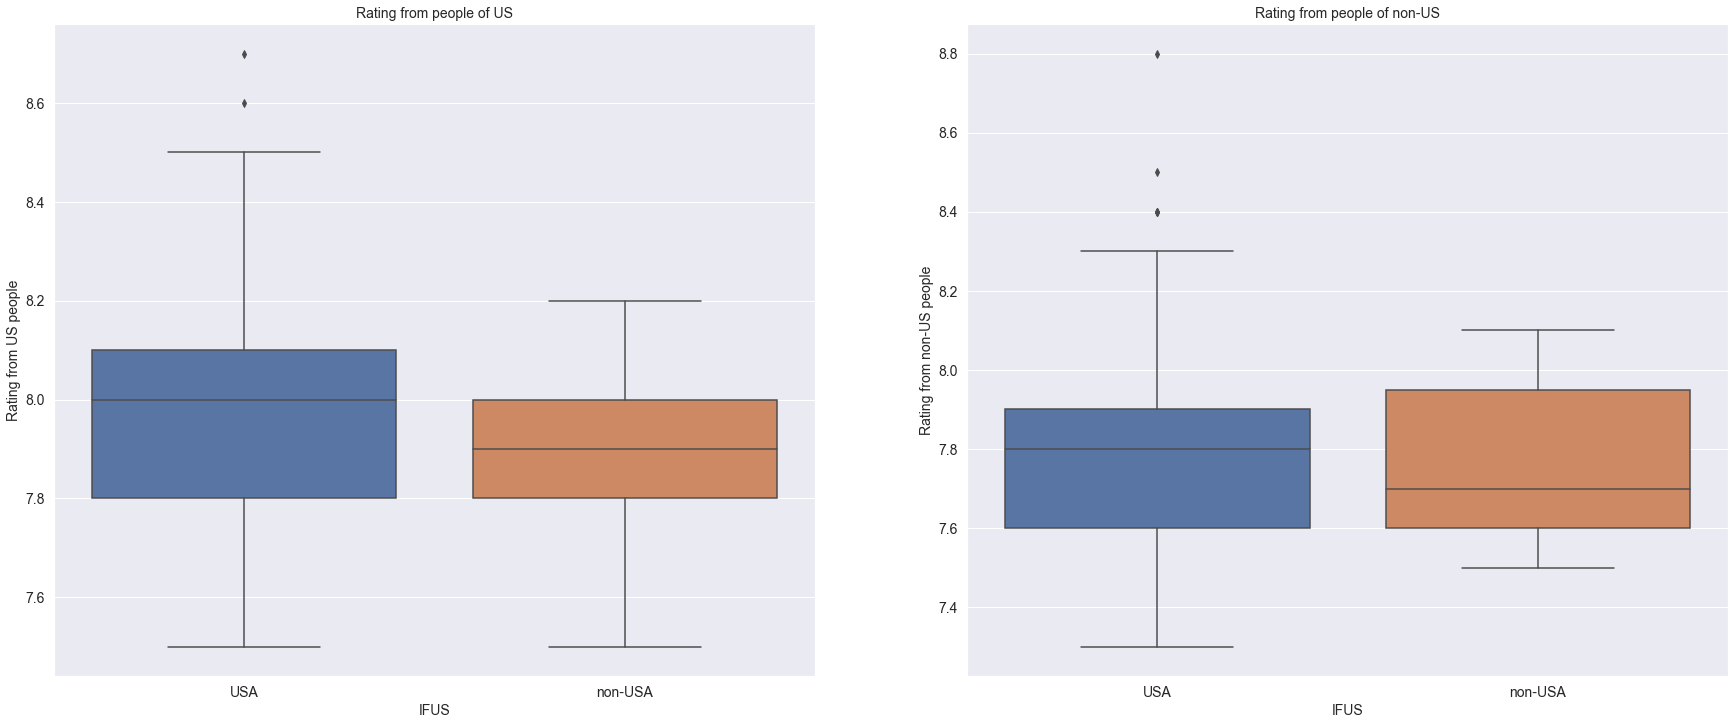

In [605]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
t=movies[movies.IFUS == 'USA' ]
t1=movies[movies.IFUS == 'non-USA' ]

#INSPECTING DATAFRAME : 
print("IQR USA movies: ",t.VotesUS.quantile(0.75) - t.VotesUS.quantile(0.25))
print("IQR non-USA movies: ",t1.VotesUS.quantile(0.75) - t1.VotesUS.quantile(0.25))
print("IQR USA movies: ",t.VotesnUS.quantile(0.75) - t.VotesnUS.quantile(0.25))
print("IQR non-USA movies: ",t1.VotesnUS.quantile(0.75) - t1.VotesnUS.quantile(0.25))


#increase font size of the graph
sns.set(font_scale=2)
fig,ax = plt.subplots(1, 2,figsize = (30,12))

#US people
ax[0] = sns.boxplot(x="IFUS",y="VotesUS",data=movies,ax=ax[0])
ax[0].set_title('Rating from people of US', fontsize=14)
ax[0].set(xlabel='IFUS', ylabel='Rating from US people')
for item in ([ ax[0].xaxis.label, ax[0].yaxis.label] +
             ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    item.set_fontsize(14)
    
#non-US people
ax[1] = sns.boxplot(x="IFUS",y="VotesnUS",data=movies,ax=ax[1])
ax[1].set_title('Rating from people of non-US', fontsize=14)
ax[1].set(xlabel='IFUS', ylabel='Rating from non-US people')
for item in ([ ax[1].xaxis.label, ax[1].yaxis.label] +
             ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    item.set_fontsize(14)
    
plt.show()


**`Inferences:`** Write your two inferences/observations below:
#### - Inference 1:

1) In first plot, median rating from US people is approx 8.0 for USA and 7.9 for non-USA movies. 

Median value is higher for USA movies compared to non-USA movies. Also data spread is different around the median.

In US, most people gave higher rating for USA movies than non-USA movies.

2) Comparatively in second plot the median rating from non-US people is approx 7.8 for USA and 7.7 for non-USA movies.

Median value is also different for USA and non-USA movies. Also data spread is different around the median.

In non-US, most people gave higher rating for USA movies than non-USA movies.

3) So USA people gave higher rating in general than non-USA people for both USA and non-USA movies.
 

#### - Inference 2:


1) In first plot of rating for US people, USA movies has a longer box and larger IQR =0.3 and  non-USA movies has a shorter box and smaller IQR = 0.2. So USA movies have more variation in middle half of data than USA movies.
Also there are few outliers in USA movies but no outliers in non-USA movies.

2) In second plot of rating for non-US people, USA movies has a shorter box and shorter IQR =0.4 and  non-USA movies also has a longer box and larger IQR =0.375. So both USA and non-USA movies have more variation in middle half of data.
Also there are few outliers in USA movies but no outliers in non-USA movies.


-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres.                                                                                                                        

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [608]:
# Sorting by CVotes1000
top10_sorted_by_cvotes1000 = genre_top10.sort_values(by="CVotes1000",ascending=False)

#INSPECTING DATAFRAME : check first 5 rows
display(top10_sorted_by_cvotes1000.head())

    

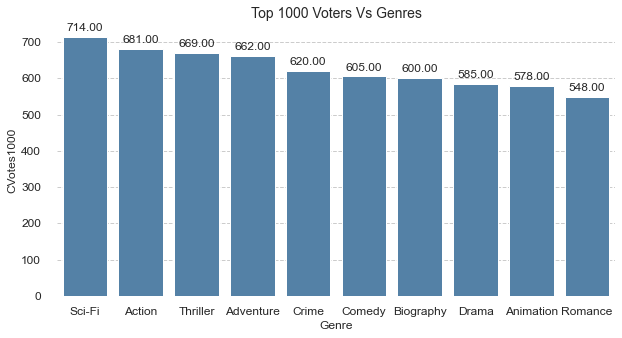

In [609]:
# Bar plot

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.set(font_scale=1)

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

ax.set_facecolor('white')
# Add x, y gridlines 
ax.grid(b = True, color ='black', 
        linestyle ='--', linewidth = 1.0, 
        alpha = 0.2) 
  

ax = sns.barplot(x="genre",y="CVotes1000",data=top10_sorted_by_cvotes1000,color="steelblue")
ax.set_title('Top 1000 Voters Vs Genres', fontsize=14)

ax.set(xlabel='Genre', ylabel='CVotes1000')
for item in ([ ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

for p in ax.patches:
#     print(p.get_height(),":",p.get_x(),":",p.get_width())

    bar_width=  p.get_width()# which is 0.8
    pt_x = p.get_x() + bar_width / 2.0
    pt_y = p.get_height()
    txt_label = format(pt_y, '.2f')
    
    ax.annotate(txt_label, 
                   xy=(pt_x , pt_y), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9), 
                    size=12,
                   textcoords = 'offset points')
    



plt.show(ax)


**`Inferences:`** Write your inferences/observations here.

1) Highest votes are given to Sci-Fi genre and lowest votes are given to Romance genre.

2) Next popular genres are Action and Thriller and Adventure 

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.